In [1]:
import os
import cv2
import random
import yaml
import matplotlib.pyplot as plt


In [2]:

base_path = '/kaggle/input/vegetables-and-fruits-datasets/LVIS_Fruits_And_Vegetables'


images_path = os.path.join(base_path, 'images/train/train')
labels_path = '/kaggle/input/vegetables-and-fruits-datasets/LVIS_Fruits_And_Vegetables/labels/train/train'
yaml_path = os.path.join(base_path, 'data.yaml')


In [3]:

with open(yaml_path, 'r') as f:
    data_yaml = yaml.safe_load(f)

class_names = data_yaml['names']
print("Loaded class names:", class_names)


Loaded class names: {0: 'almond', 1: 'apple', 2: 'apricot', 3: 'artichoke', 4: 'asparagus', 5: 'avocado', 6: 'banana', 7: 'bean curd/tofu', 8: 'bell pepper/capsicum', 9: 'blackberry', 10: 'blueberry', 11: 'broccoli', 12: 'brussels sprouts', 13: 'cantaloup/cantaloupe', 14: 'carrot', 15: 'cauliflower', 16: 'cayenne/cayenne spice/cayenne pepper/cayenne pepper spice/red pepper/red pepper', 17: 'celery', 18: 'cherry', 19: 'chickpea/garbanzo', 20: 'chili/chili vegetable/chili pepper/chili pepper vegetable/chilli/chilli vegetable/chilly/chilly', 21: 'clementine', 22: 'coconut/cocoanut', 23: 'edible corn/corn/maize', 24: 'cucumber/cuke', 25: 'date/date fruit', 26: 'eggplant/aubergine', 27: 'fig/fig fruit', 28: 'garlic/ail', 29: 'ginger/gingerroot', 30: 'Strawberry', 31: 'gourd', 32: 'grape', 33: 'green bean', 34: 'green onion/spring onion/scallion', 35: 'Tomato', 36: 'kiwi fruit', 37: 'lemon', 38: 'lettuce', 39: 'lime', 40: 'mandarin orange', 41: 'melon', 42: 'mushroom', 43: 'onion', 44: 'oran

In [4]:
def plot_sample_images(images_path, labels_path, class_names, num_samples=4):
    image_files = [f for f in os.listdir(images_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

    if len(image_files) == 0:
        print("No image files found in the specified path!")
        return

    num_samples = min(num_samples, len(image_files))
    sample_images = random.sample(image_files, num_samples)

    plt.figure(figsize=(16, 8))

    for idx, image_name in enumerate(sample_images):
        img_path = os.path.join(images_path, image_name)
        label_name = image_name.rsplit('.', 1)[0] + '.txt'
        label_path = os.path.join(labels_path, label_name)

        img = cv2.imread(img_path)

        if img is None:
            print(f"Skipping unreadable image: {image_name}")
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_h, img_w = img.shape[:2]

        plt.subplot(1, num_samples, idx + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(image_name)

        
        if os.path.exists(label_path):
            with open(label_path, 'r') as file:
                for line in file:
                    parts = line.strip().split()
                    class_id, x_center, y_center, width, height = map(float, parts)

                    
                    x_center *= img_w
                    y_center *= img_h
                    width *= img_w
                    height *= img_h

                    x1 = int(x_center - width / 2)
                    y1 = int(y_center - height / 2)

                    rect = plt.Rectangle((x1, y1), width, height,
                                         linewidth=2, edgecolor='lime', facecolor='none')
                    plt.gca().add_patch(rect)
                    plt.text(x1, y1 - 10, class_names[int(class_id)],
                             color='yellow', fontsize=10, backgroundcolor='black')

    plt.tight_layout()
    plt.show()


In [5]:
image_files = [f for f in os.listdir(images_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
print("Found images:", image_files[:5])
print("Total images:", len(image_files))


Found images: ['000000009511.jpg', '000000052626.jpg', '000000486789.jpg', '000000268403.jpg', '000000190572.jpg']
Total images: 6721


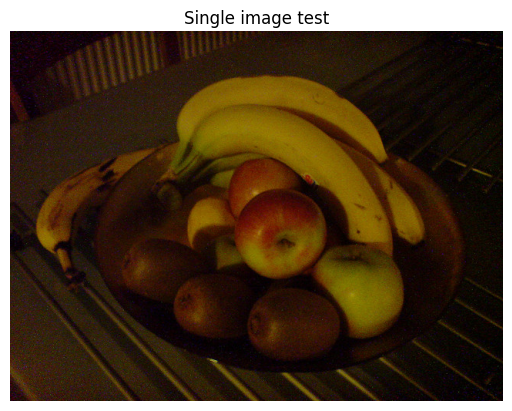

In [6]:
import cv2
from matplotlib import pyplot as plt


img_path = os.path.join(images_path, os.listdir(images_path)[0])
img = cv2.imread(img_path)

if img is not None:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.title("Single image test")
    plt.show()
else:
    print("Could not load image:", img_path)


In [7]:
print("Label samples:", os.listdir(labels_path)[:5])
print("Total label files:", len(os.listdir(labels_path)))


Label samples: ['000000347216.txt', '000000393781.txt', '000000202918.txt', '000000447439.txt', '000000238562.txt']
Total label files: 6721


In [8]:
sample_image = image_files[0]
expected_label = sample_image.rsplit('.', 1)[0] + '.txt'
print("Sample image:", sample_image)
print("Expected label:", expected_label)
print("Label exists:", os.path.exists(os.path.join(labels_path, expected_label)))


Sample image: 000000009511.jpg
Expected label: 000000009511.txt
Label exists: True


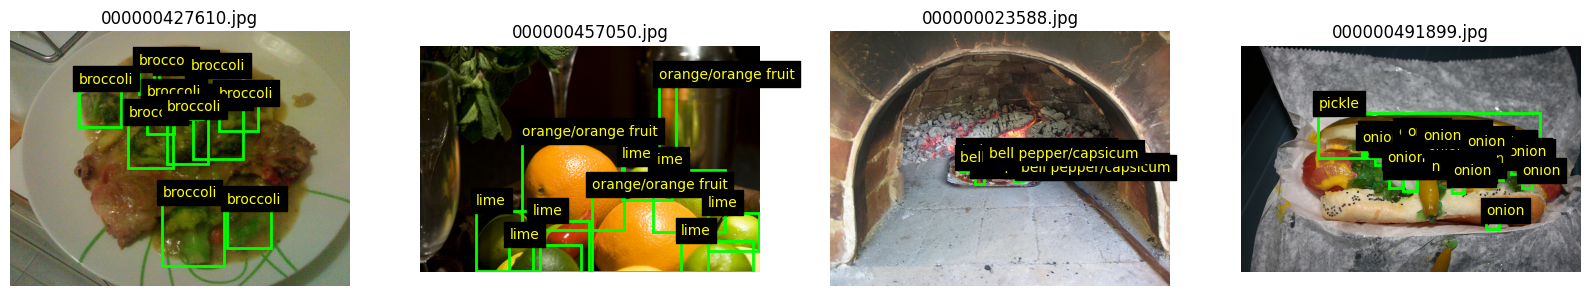

In [9]:
plot_sample_images(images_path, labels_path, class_names)


In [10]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 16.8 MB/s eta 0:00:00a 0:00:01


In [11]:
with open(yaml_path, 'r') as f:
    data_yaml = yaml.safe_load(f)

print(data_yaml)


{'path': 'LVIS_Fruits_And_Vegetables', 'train': 'images/train', 'val': 'images/test', 'test': 'images/test', 'names': {0: 'almond', 1: 'apple', 2: 'apricot', 3: 'artichoke', 4: 'asparagus', 5: 'avocado', 6: 'banana', 7: 'bean curd/tofu', 8: 'bell pepper/capsicum', 9: 'blackberry', 10: 'blueberry', 11: 'broccoli', 12: 'brussels sprouts', 13: 'cantaloup/cantaloupe', 14: 'carrot', 15: 'cauliflower', 16: 'cayenne/cayenne spice/cayenne pepper/cayenne pepper spice/red pepper/red pepper', 17: 'celery', 18: 'cherry', 19: 'chickpea/garbanzo', 20: 'chili/chili vegetable/chili pepper/chili pepper vegetable/chilli/chilli vegetable/chilly/chilly', 21: 'clementine', 22: 'coconut/cocoanut', 23: 'edible corn/corn/maize', 24: 'cucumber/cuke', 25: 'date/date fruit', 26: 'eggplant/aubergine', 27: 'fig/fig fruit', 28: 'garlic/ail', 29: 'ginger/gingerroot', 30: 'Strawberry', 31: 'gourd', 32: 'grape', 33: 'green bean', 34: 'green onion/spring onion/scallion', 35: 'Tomato', 36: 'kiwi fruit', 37: 'lemon', 38:

In [12]:
# Create a fixed data.yaml in the current working directory
fixed_yaml_path = '/kaggle/working/data.yaml'

with open(fixed_yaml_path, 'w') as f:
    f.write(f"""
train: {base_path}/images/train/train
val: {base_path}/images/test
nc: {len(class_names)}
names: {class_names}
""")
    
print("✅ Fixed data.yaml saved at:", fixed_yaml_path)


✅ Fixed data.yaml saved at: /kaggle/working/data.yaml


In [13]:
from ultralytics import YOLO


model = YOLO('yolov8s.pt')

# Train
results = model.train(
    data=fixed_yaml_path,
    epochs=10,
    imgsz=640,
    batch=16,
    project='fruit-veg-detection',
    name='yolov8s',
    exist_ok=True
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 177MB/s]


Ultralytics 8.3.97 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=fruit-veg-detection, name=yolov8s, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

100%|██████████| 755k/755k [00:00<00:00, 17.6MB/s]


Overriding model.yaml nc=80 with nc=63

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 76.3MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/vegetables-and-fruits-datasets/LVIS_Fruits_And_Vegetables/labels/train/train... 6721 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6721/6721 [00:21<00:00, 319.53it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/vegetables-and-fruits-datasets/LVIS_Fruits_And_Vegetables/labels/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/vegetables-and-fruits-datasets/LVIS_Fruits_And_Vegetables/labels/test... 180 images, 30 backgrounds, 0 corrupt: 100%|██████████| 180/180 [00:00<00:00, 228.82it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/vegetables-and-fruits-datasets/LVIS_Fruits_And_Vegetables/labels is not writeable, cache not saved.
Plotting labels to fruit-veg-detection/yolov8s/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000149, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to fruit-veg-detection/yolov8s
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      10.9G      1.452      3.627       1.23         17        640: 100%|██████████| 421/421 [02:10<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.70it/s]

                   all        180       2725      0.911     0.0675     0.0889     0.0571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      12.3G      1.347      2.404      1.171          1        640: 100%|██████████| 421/421 [02:11<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.12it/s]

                   all        180       2725      0.627      0.151      0.127     0.0802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      12.3G      1.323      2.153      1.157        143        640: 100%|██████████| 421/421 [02:10<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.15it/s]

                   all        180       2725      0.582      0.131      0.118       0.07



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      12.3G      1.304      2.015       1.15         97        640: 100%|██████████| 421/421 [02:10<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.13it/s]

                   all        180       2725      0.468      0.183      0.155     0.0983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      12.3G      1.277      1.897      1.135         13        640: 100%|██████████| 421/421 [02:10<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.30it/s]

                   all        180       2725      0.439      0.195      0.164     0.0999



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      12.3G      1.257      1.794      1.127          7        640: 100%|██████████| 421/421 [02:10<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.38it/s]


                   all        180       2725      0.431      0.227      0.165      0.103

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      12.3G      1.247       1.71      1.118         13        640: 100%|██████████| 421/421 [02:10<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.36it/s]

                   all        180       2725      0.425       0.21       0.18      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      12.3G      1.237      1.641      1.114         38        640: 100%|██████████| 421/421 [02:09<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.27it/s]

                   all        180       2725       0.43      0.222       0.19      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      12.3G      1.221      1.573      1.103         18        640: 100%|██████████| 421/421 [02:10<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.50it/s]

                   all        180       2725      0.455       0.24        0.2      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      13.8G      1.215      1.535      1.097          2        640: 100%|██████████| 421/421 [02:10<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.61it/s]


                   all        180       2725      0.438      0.236      0.197      0.121

10 epochs completed in 0.370 hours.
Optimizer stripped from fruit-veg-detection/yolov8s/weights/last.pt, 22.5MB
Optimizer stripped from fruit-veg-detection/yolov8s/weights/best.pt, 22.5MB

Validating fruit-veg-detection/yolov8s/weights/best.pt...
Ultralytics 8.3.97 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,149,965 parameters, 0 gradients, 28.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.49it/s]


                   all        180       2725      0.456       0.24        0.2      0.124
                almond          2          5      0.402        0.2      0.204      0.123
                 apple         12         25      0.224      0.728      0.414      0.315
             asparagus          1          8       0.22      0.125      0.104     0.0532
               avocado         11         16          0          0     0.0135     0.0086
                banana         32         76      0.464      0.921      0.872      0.528
        bean curd/tofu          1          5          1          0          0          0
  bell pepper/capsicum         12        110      0.321     0.0545     0.0824     0.0531
            blackberry          5         23       0.03      0.313     0.0493     0.0327
             blueberry         30       1049      0.775      0.787      0.846      0.465
              broccoli          8         30      0.297      0.733      0.529      0.277
                carro

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 3.4ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to fruit-veg-detection/yolov8s


In [14]:

trained_model = YOLO('/kaggle/working/fruit-veg-detection/yolov8s/weights/best.pt')


image 1/1 /kaggle/input/vegetables-and-fruits-datasets/LVIS_Fruits_And_Vegetables/images/test/20240326_3c8f4813-06ae-4d71-8dd3-d6f5d2e41c9a_3_png.rf.892d265df110edce6cd9edf0de4b830e.jpg: 640x384 2 carrots, 40.0ms
Speed: 3.0ms preprocess, 40.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)


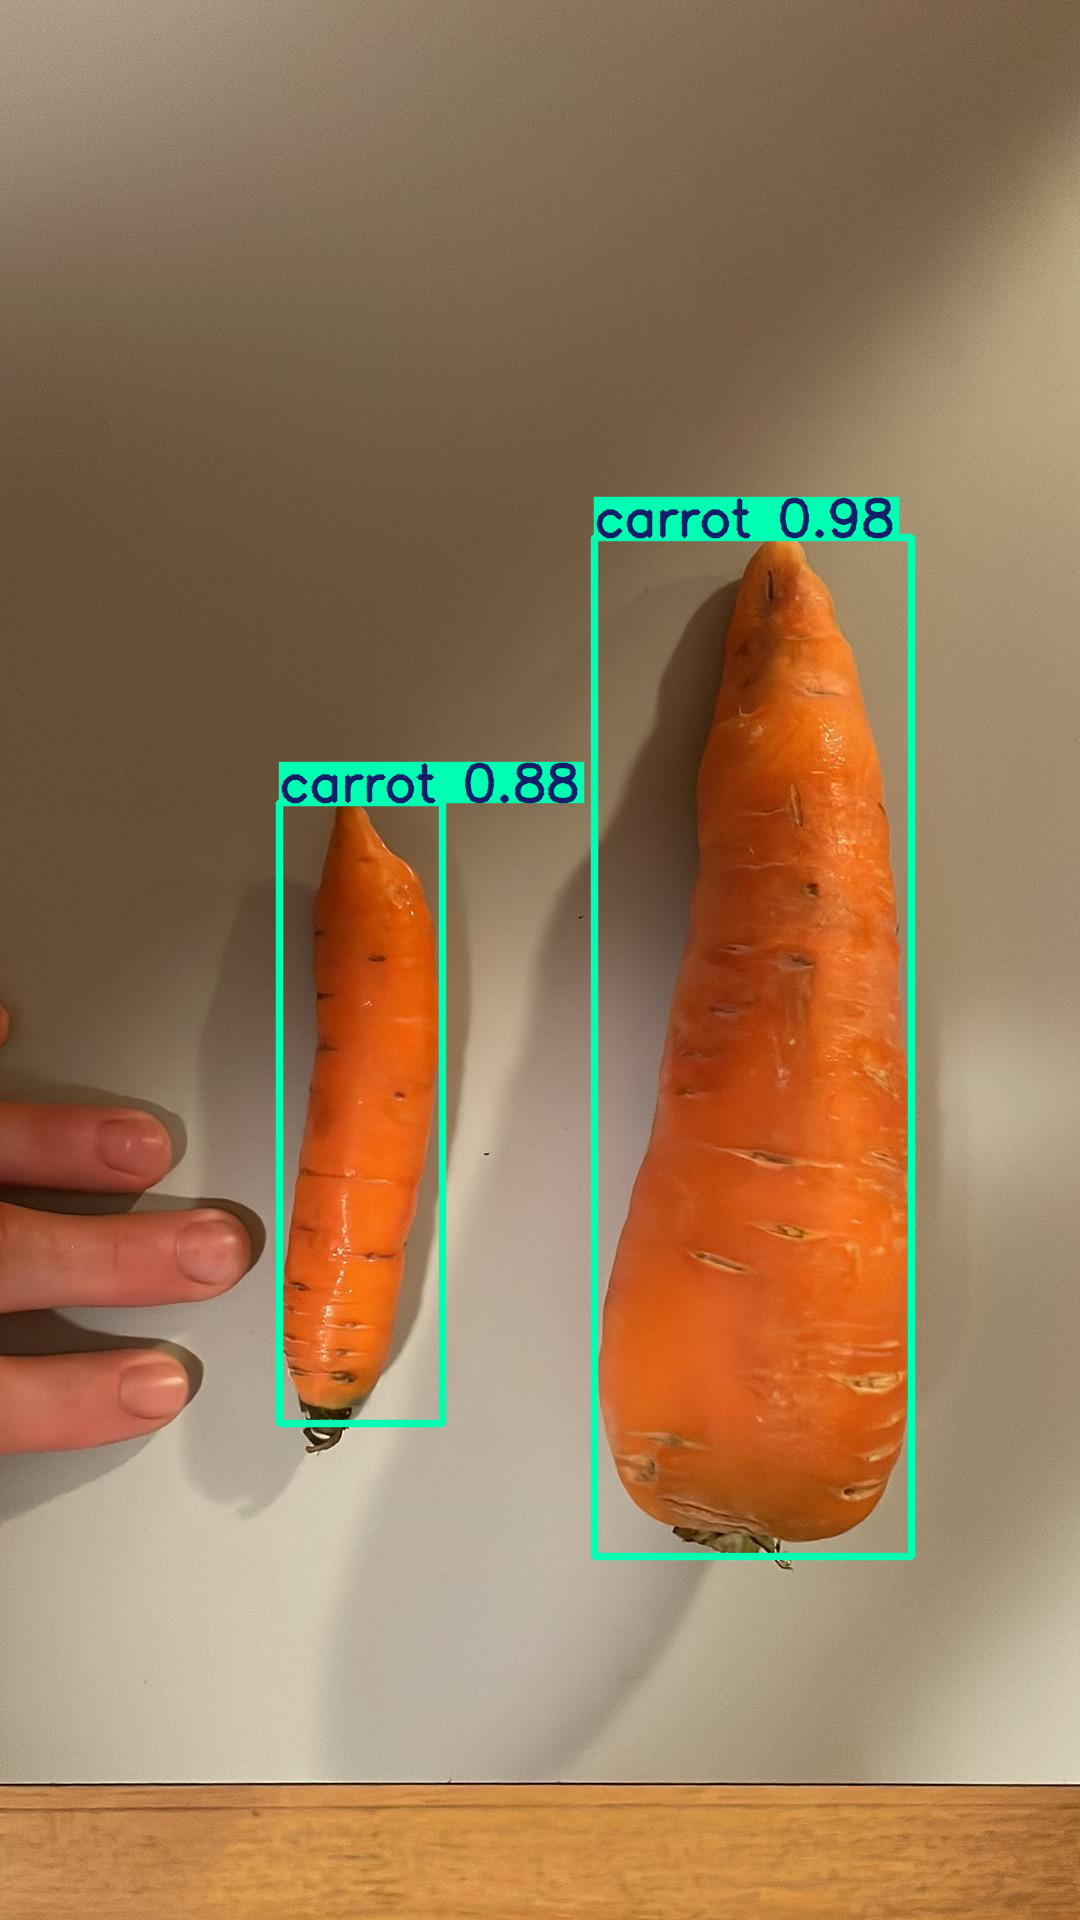

In [17]:

test_image = f"{base_path}/images/test/20240326_3c8f4813-06ae-4d71-8dd3-d6f5d2e41c9a_3_png.rf.892d265df110edce6cd9edf0de4b830e.jpg"  # Replace with any filename


results = trained_model(test_image)


results[0].show()  


In [18]:
carrot = '/kaggle/input/test-inputs/Carrots.jpg'
apple = '/kaggle/input/test-inputs/apple.jpg'
cabbage = '/kaggle/input/test-inputs/cabbage.jpg'
parsley = '/kaggle/input/test-inputs/parsley.png'
vegies = '/kaggle/input/test-inputs/vegies.jpg'


image 1/1 /kaggle/input/test-inputs/Carrots.jpg: 416x640 1 asparagus, 10 carrots, 1 green bean, 41.7ms
Speed: 2.3ms preprocess, 41.7ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)


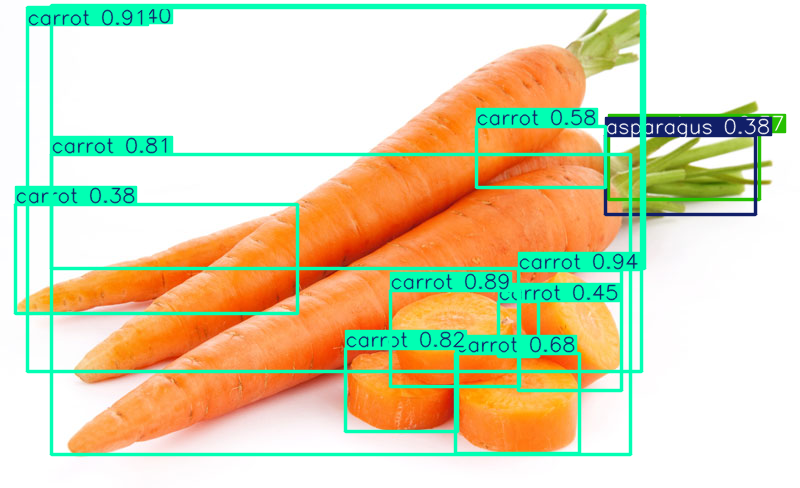

In [19]:

results = trained_model(carrot)


results[0].show()



image 1/1 /kaggle/input/test-inputs/apple.jpg: 480x640 3 apples, 41.7ms
Speed: 2.4ms preprocess, 41.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


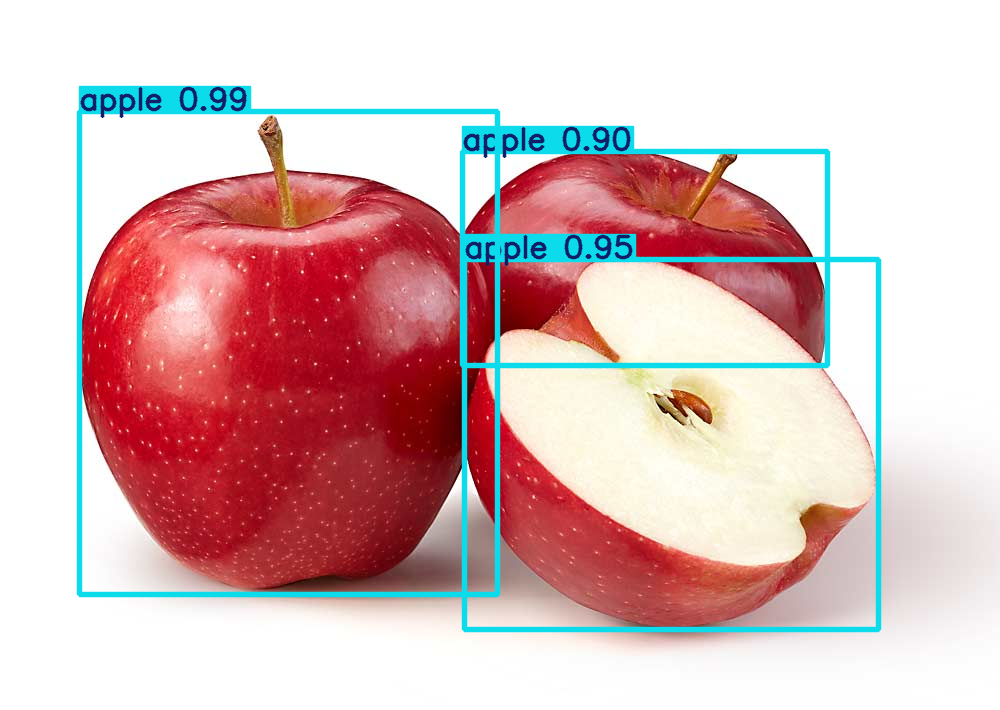

In [20]:

results = trained_model(apple)


results[0].show()



image 1/1 /kaggle/input/test-inputs/vegies.jpg: 288x640 1 apple, 2 broccolis, 2 carrots, 1 kiwi fruit, 2 strawberrys, 1 tomato, 40.7ms
Speed: 2.3ms preprocess, 40.7ms inference, 1.3ms postprocess per image at shape (1, 3, 288, 640)


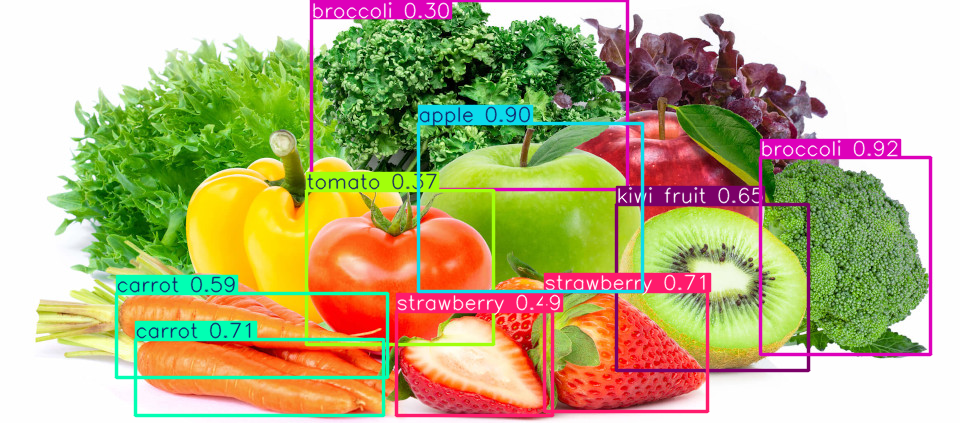

In [23]:

results = trained_model(vegies)


results[0].show()
